In [1]:
import requests
from bs4 import BeautifulSoup
import jieba_setting, draw

In [2]:
def get_title(result): # return current_page_title_text
    current_page_title_text = ""  #當前頁面的標題字串
    for i in result.find_all("div", {"class":"r-ent"}):
        # 過濾標題會有被刪文後變成Nonetype的狀況
        title_name = i.find(class_="title").a
        if title_name is None:
            pass
        else:
            #print(title_name.text)
            current_page_title_text += title_name.text

    return current_page_title_text

In [3]:
def get_data(): # return all_title_text
    #爬一次第一頁
    URL_HOME = "https://www.ptt.cc/bbs/C_Chat/index.html"
    HEADERS = {
    "user-agent": "Chrome/97.0.4692.71"
    }
    response = requests.get(url=URL_HOME, headers=HEADERS)
    result = BeautifulSoup(response.text, "html5lib")
    all_title_text = "" #所有標題爬完後的標題字串
    all_title_text += get_title(result=result)
    
    for page in range(100): #爬取頁數待定，需觀察一日文量，之後改成日期
        #print("第{}頁".format(page+2))
        btn = result.select("div.btn-group a")
        prevURL = btn[3]['href']
        URL_NOW = "https://www.ptt.cc" + prevURL
        response = requests.get(url=URL_NOW, headers=HEADERS)
        result = BeautifulSoup(response.text, "html5lib")
        all_title_text += get_title(result=result)

    return all_title_text

In [4]:
def clean_title(all_title_text): # return all_title_text
    # 過濾標題的屬性符號&空白
    all_title_text = all_title_text.replace("[", "")
    all_title_text = all_title_text.replace("]", "")
    all_title_text = all_title_text.replace(" ", "")

    # 去除中文常出現的標點符號(ptt會變成全形)
    all_title_text = all_title_text.replace("？", "")
    all_title_text = all_title_text.replace("，", "")
    all_title_text = all_title_text.replace("。", "")
    all_title_text = all_title_text.replace("！", "")
    all_title_text = all_title_text.replace("《", "")
    all_title_text = all_title_text.replace("》", "")

    # 去除中文常出現的介係詞、語尾詞等
    all_title_text = all_title_text.replace("嗎", "")
    all_title_text = all_title_text.replace("齁", "")
    all_title_text = all_title_text.replace("的", "")
    all_title_text = all_title_text.replace("了", "")
    all_title_text = all_title_text.replace("會", "")
    all_title_text = all_title_text.replace("有", "")
    all_title_text = all_title_text.replace("在", "")
    all_title_text = all_title_text.replace("再", "")
    all_title_text = all_title_text.replace("跟", "")
    all_title_text = all_title_text.replace("很", "")
    all_title_text = all_title_text.replace("吧", "")
    all_title_text = all_title_text.replace("啊", "")
    all_title_text = all_title_text.replace("為", "")
    all_title_text = all_title_text.replace("不", "")
    all_title_text = all_title_text.replace("沒", "")
    all_title_text = all_title_text.replace("是不是", "")
    all_title_text = all_title_text.replace("是", "")
    all_title_text = all_title_text.replace("什麼", "")
    all_title_text = all_title_text.replace("甚麼", "")
    all_title_text = all_title_text.replace("為何", "")
    all_title_text = all_title_text.replace("為什麼", "")
    all_title_text = all_title_text.replace("如果", "")
    all_title_text = all_title_text.replace("怎麼", "")
    all_title_text = all_title_text.replace("怎樣", "")


    # 去除西洽版中過常出現與內容無關的文字(如：標題類型)
    all_title_text = all_title_text.replace("閒聊", "")
    all_title_text = all_title_text.replace("Re:", "")
    all_title_text = all_title_text.replace("Fw:", "")
    all_title_text = all_title_text.replace("公告", "")
    all_title_text = all_title_text.replace("情報", "")
    all_title_text = all_title_text.replace("討論", "")
    all_title_text = all_title_text.replace("問題", "")
    all_title_text = all_title_text.replace("Vtub", "") #如果過多可以加上，所以到底為什麼不開專版


    # 去除英文上的標點符號
    import string
    all_title_text = all_title_text.translate(str.maketrans('', '', string.punctuation))

    return all_title_text

[直播] 黃金神威馬拉松五點換片
Re: [Vtub] 支持皮魂的人應該換中之人也沒差吧
[Vtub] 露西亞算是一種出租女友嗎？
[閒聊] 破處是什麼感覺¿ ¡ 
[彈射] 台版的日版一周年慶紀念任務要來了
Re: [討論] 為什麼日本忍者紅遍世界 武俠反而沒落
[公告] 板主候選人政見一覽表
[討論] 為什麼沒人會想追吉祥物的中之人？
[公告] 看板活動公告彙整 ＆ 置底推文閒聊區
[公告] C_Chat板板規 v.16.7
[公告] C_Chat板主徵選開始&發過年紅包
[公告] 咱就要卸任啦&快來參選板主
[公告] 板主候選人政見一覽表
[鬼滅]I smell a demon 
[閒聊] 有人今天收到巧克力的嗎
[閒聊] POE移除賽季主線重置會不會比較好？
[奶子] 有點危險 背後注意 繪師推薦
[閒聊] 機械法老吃雞
[新聞] 巨人配音現身動漫展...喊：萊納 你坐阿
[討論] 地錯算毒物小說嗎
[閒聊] 是不是露西亞給的自由過了火
[笑死] 遊戲王MD：所以說白金也是有智障的
[閒聊] 野生的幸福蛋
[鬼滅] 童磨
[閒聊] 哪些作品可以套用OO太可惡！
[ＳＣ] 情人節巧克前輩
[問題] 粉屍會嫉妒露的愛氣勢如虹嗎?
Re: [問題] 為什麼這麼多輕小漫畫都喜歡買奴隸?
Fw: [好雷] 讓我聽見愛的歌聲
[Vtub] Miko送的巧克力，好好吃捏
Re: [問題] 為什麼這麼多輕小漫畫都喜歡買奴隸?
[閒聊] 阿梅跟店長的情人節cover曲
[閒聊] 善逸情人節會怎麼跟禰豆子過？
Re: [討論] 為什麼日本忍者紅遍世界 武俠反而沒落
[閒聊] mfmf一定很愛露西亞 也把我比下去...
Re: [討論] VT換魂不換皮能被接受的方式
[閒聊] XB2范達美幕妮雅發功光就沒機會出現了吧
[巨人] 艾連跟吉克去哪裡學打棒球的
[閒聊] 哈洽馬如果有男友會不會炎上阿?
[Vtub] 風真168今晚工商的Heaven Burns Red
[Vtub] 想讓 露西婭 幫我吹告白氣球
[閒聊] 龍女僕、讚！(遊戲王MD)
[Vtub] 公視小媒突襲開播，情人節陪大家吃晚餐～
Re: [討論] VT換魂不換皮能被接受的方式
[Vtub] 彩虹社 帕塔姐 競艇播報
[閒聊] 蹲 小粉屍蹲 小粉屍蹲
Re: [閒聊] 幻塔和遊戲王根本制霸動漫節
[閒聊] 情人節的

Building prefix dict from o:\CChat_Wordcloud_Project\Data\dict.txt.big ...


[情報] Animax 要播無職了2/15
[今泉] 慎重起見
Re: [Vtub] mfmf 推特
Re: [Vtub] mfmf 推特
[情報] 壽屋 女神裝置、AGA、武裝神姬、EVA
[Vtub] 露西亞是不是該走百鬼路線了?
[閒聊] 因為電動最後同居結婚生子
[BGD] 又一首ＥＸ ＦＣ
[閒聊] 關於魔戒影集的一些訊息和猜想
[閒聊] 請推薦一生中必玩的NS遊戲
[閒聊] V有交往到底哪點接受不了？
[討論] 咪口的胸部這麼大
[閒聊] 麗子跟阿兩銬在一起的時候 怎換衣服的
[閒聊] 原神 造就了美國動作手遊市場總成長69%
[問題] 如果小倉唯結婚，大家也會炎上嗎?
[Vtub] 神樂七奈 《GROOVE COASTER》VT DLC
[閒聊] 開放世界還能用什麼來引導玩家探索
Re: [問題] 武俠的設定很難自圓其說吧
[問題]  問一個手遊


Dumping model to file cache C:\Users\GSX-40~1\AppData\Local\Temp\jieba.u36c6cda27f7ac53014056a3217a32780.cache
Loading model cost 1.513 seconds.
Prefix dict has been built successfully.


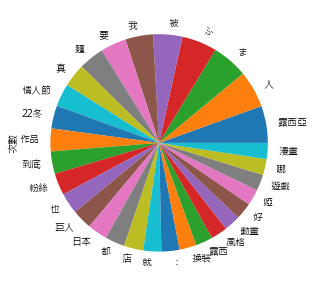

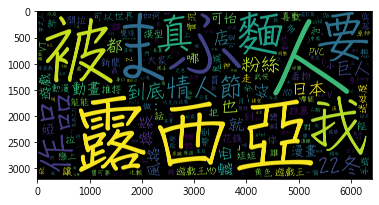

In [5]:
if __name__ == "__main__":
    all_title_text = get_data()
    all_title_text = clean_title(all_title_text)
    dict_text = jieba_setting.setting(all_title_text)

    df_frequency = draw.show_frequency(dict_text)
    draw.show_pie_plot(df_frequency)
    draw.show_wordcloud(dict_text)